In [1]:
# Import general libraries
    #used for plotting
import seaborn as sns
import matplotlib.pyplot as plt
    #used for processing of dataframes
import pandas as pd
import numpy as np

# Additions for section 2
    #used for splitting training and testing sets for later modeling
from sklearn.model_selection import train_test_split
    #used for scaling of data
from sklearn.preprocessing import StandardScaler
    #used for imputation for missing values in data
from sklearn.impute import SimpleImputer, KNNImputer
    #used for SMOTE oversampling
from imblearn.over_sampling import SMOTE #to install: conda install -c conda-forge imbalanced-learn

# Additions for section 3
    #used for evaluation of linear assumption of data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Additions for section 4
    #used for random forest model building
from sklearn.ensemble import RandomForestClassifier
    #used for random forest hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
    #used for model evaluation
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve

# Additions for section 5
    #used for further model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc

#for comapring models
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


# Pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

### Python Library Citations
*General packages*
1. Waskom, M. et al., 2017. mwaskom/seaborn: v0.8.1 (September 2017), Zenodo. Available at: https://doi.org/10.5281/zenodo.883859.
2. Hunter, J.D., 2007. Matplotlib: A 2D graphics environment. Computing in science &amp; engineering, 9(3), pp.90–95.
3. McKinney, W. & others, 2010. Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference. pp. 51–56.
4. Harris, C.R. et al., 2020. Array programming with NumPy. Nature, 585, pp.357–362.

*Additions for section 2, 3, 4, 5*

5. Pedregosa, F. et al., 2011. Scikit-learn: Machine learning in Python. Journal of machine learning research, 12(Oct), pp.2825–2830.

# Prediction Model for Alzheimer’s Disease
### Table of Contents <a id="table-contents"></a>
This is the final project (predicting Alzheimer's Disease) of the CS109A class during Fall 2023 with members Xinyu Chen, Kyla Gabriel, Sofia Rojas, and Tilly Rigby (Group 60).

*Note that the internal links of the table of contents work in Jupyter notebook, but VSCode and Google Colab has compatibility issues*
1. [Problem Statement](#problem-statement)
2. [Data Preprocessing](#data-preprocessing)
3. [EDA (exploratory data analysis)](#eda)
4. [Choosing A Model: Random Forest with Cross Validation](#model_choice)
5. [Model Interpretation and Evaluation](#model_eval)
6. [Comparison to Simple Decision Tree and Bagging Model](#model_comparison)
7. [Conclusion](#conclude)


<a id="problem-statement"></a>
# 1. Problem Statement

<div style="background: #f5f5dc; border: thin solid black; padding: 5px">

Dementia and Alzheimer’s Disease (AD) are progressive neurodevelopmental diseases that are  characterized by continuous cognitive decay. The working understanding for the cause of dementia and AD can be explained by neuron malfunction. Regions of the brian like the hippocampus, entorhinal cortex, and medial temporal diminish in size due to beta-amyloid protein and tau protein accumulation. The beta-amyloid peptide is a normally occurring protein, but it has the propensity to stick together and build up leading to stress on the neuron. Similarly, the tau protein plays a vital role by specifically regulating structural entities inside of the neuron. Loss of function causes neurofibrillary tangles leading to inflammation. The stress and inflammation of neurons lead to cell death and shrinkage of the brain like the aforementioned brain regions.

This degeneration leads to memory loss, difficulty in speech, confusion, as well as many other debilitating symptoms. Because of this, it is vitally important to be able to diagnose early and predict the likelihood of an individual developing the disease. Early treatment through prediction can slow the progression of the disease and improve the individual’s overall quality of life. For this reason, we decided to analyze what predictors from the research study, Alzheimer's Disease Neuroimaging Initiative (ADNI), to see if there are patterns or trends that can be made to predict the likelihood of an individual having dementia or AD. 
    
There are many variables that can be found in the ADNI dataset which is why we chose to use it for our prediction model. Specifically, it includes variables on specific neuroimaging aspects (radioactive tracers, brain region size, and MRI parameters), neurological assessments, clinical biomarkers, and demographics. We found demographics to be an important aspect to consider in our model because it could serve direct real-world applications. If there are trends in the data and if our model shows that certain demogrpahics are good predictors for AD, then it is vital information that can be relayed for the clinical applications.

The problem we are aiming to solve is if we can accurately determine a dementia/ AD diagnosis in patients using demographic and clinical data from the ADNI dataset. It is important to find ways to predict AD and dementia because early diagnosis could slow neurodegenerative progression. Furthermore,  specific predictors from the resulting prediction model can point towards certain demographics and be useful for warning these populations. Our model uses the diagnosis "DX" response variable with predictor variables such as clinical biomarkers (like tau and APOE4 protein levels) and demographic data (like sex and age). For our data analysis, we use the regression technique of total sum of squares to evaluate the variability of the diagnosis response variable. We measured the performance of our model using this to establish thhe goodness of fit of the data to our model, Our conclusions yield if the specified predictors are useful to our goal of prediciting dementia in ADNI participants.

# 2. Data Preprocessing <a id='data-preprocessing'></a>

[Return to table of contents](#table-contents)

<div style="background: #f5f5dc; border: thin solid black; padding: 5px">

`Summary` of this section:
1) We obtained the original data from ADNI and filtered the dataset based on manually selected variables related to demographics, neuroimaging, clinical tests, neuroanatomy and assessments. ADNI contains many scans for each patient, where each scan is taken at a different point in time. However, we decided to omit the relative time to each patient's baseline. The data we obtained therefore shows each scan as an independent, cross-sectional instance. By treating each scan as an independent instance, we not only augment our dataset substantially, but also preserve cross-sectional insights into the disease's progression that could be obscured when focusing solely on longitudinal changes. We maintain other temporal variables such as age, which is a more relevant consideration for the progression of the disease than the time relative to each patient's baseline. We are not interested in how one patient's diagnosis changes over time of study, but rather the individual markers to predict each class of cognitive impairment at any point in time. Therefore, a cross-sectional approach is much more appropriate than a longitudinal one. 

2) Note that all acronyms are explained at the end of the paragraph. We decided against using assessment tests (mPACCdigit_bl, MMSE, FAQ, DIGITSCOR_bl, TRABSCOR_bl, RAVLT, ADAS11, ADAS13, and CDRSB) because these predictors are confounders, as they are redundant. They are all clinical mental evaluation tests used to predict Alzheimer's, but we wanted the focus of our study to be on the biological factors and demographics. Specifically, the mental evaluation tests that we are excluding as predictor are indicators that directly tell if an individual has dementia or Alzheimer’s Disease which would disrupt the validity of our model, as we want to predict this strictly using variables that do not indicate this already. We also decided not to use predictors that used specified neuroimaging (like FLDSTRENG_bl, FDG, FBB, AV45, PIB, FSVERSION_bl, IMAGEUID_bl) techniques. We didn't use these variables because they tell us information about the MRI image which is irrelevant to our predictions. Specifically, they don't lend any information that would be predictive of AD and adding them to the list of predictors would likely lead to increased model complexity and reduced interpretability.
    
    (Acronyms: mPACCdigit_bl = Baseline Preclinical Alzheimer Cognitive Composite, MMSE = Mini-Mental State Examination, FAQ = Functional Activities Questionnaire, DIGITSCOR_bl = Baseline Digital Score, TRABSCOR_bl = unknown, RAVLT = Rey Auditory Verbal Learning Test, ADAS11 = Alzheimer's Disease Assessment Scale-Cognitive Subscale 11 items, ADAS13 = Alzheimer's Disease Assessment Scale-Cognitive Subscale 13 items, CDRSB = Clinical Dementia Rating Scale Sum of Boxes, FLDSTRENG_bl = MRI field strength, FDG = Fludeoxyglucose radioactive tracer, FBB = Florbetaben radioactive tracer, AV45 = Florbetapir radioactive tracer, PIB = Pittsburgh compound B radioactive analog of thioflavin T, FSVERSION_bl = version of software, IMAGEUID_bl = image identification number)

3) Examined the datatypes and converted non-numeric entries to float type (e.g. clinical tests sometimes have “<1700”, which is converted to “1700”), and categoricals to string type.

4) Examined the number of missing rows for each variable, and dropped those with >75% missing. (see section 2. EDA Fig 0)

5) Performed one hot encoding for categorical variables followed by train_tets_split (testing set 20%, training set 80%).

6) Lastly, we imputed the missing entries with k-Nearest Neighbors’s KNNImputer from sklearn, and scaled all the numerical variables to unit variance with StandardScaler. The advantage of using KNNImputer instead of other simple imputation techniques is because we are assuming simple linear models will not be a perfect fit for the final model due to the complexity of a dementia diagnosis. Therefore, with KNNImputer we are able to consider the non-linearity nature while without making assumptions of the distribution of the data, and imputes based on similar patients instead.

In [2]:
#read in the datasets
df_adni = pd.read_csv("ADNIMERGE_05Nov2023.csv")
df_adni_dict = pd.read_csv("ADNIMERGE_DICT_05Nov2023.csv")

/var/folders/kj/3sw1c2j950335sv1wx2vmvzc0000gn/T/ipykernel_706/396876788.py:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df_adni = pd.read_csv("ADNIMERGE_05Nov2023.csv")


In [3]:
#variable renaming & selection

cols = {
    #demogrpahics
    'AGE' : 'age',
    'PTGENDER' : 'sex',
    'PTRACCAT' : 'race',
    'PTMARRY' : 'marital_status',

    #neuroimaging
    'FDG' : 'avg_FDG',
    'PIB' : 'avg_PIB',
    'AV45' : 'avg_AV45',
    'FBB' : 'FPET', # florbetaben PET Imaging,
    #'RAVLT_immediate' : 'RAVLT_immediate',
    #'RAVLT_learning' : 'RAVLT_learning',
    #'RAVLT_forgetting' : 'RAVLT_forgetting',
    #'RAVLT_perc_forgetting' : 'RAVLT_perc_forgetting',

    #clinical
    'ABETA' : 'beta_amount', # β-amyloid protein accumulation causes plaque buildup
    'APOE4' : 'APOE4_amount', # the gene that becomes mutated and leads to the β-amyloid buildup
    'TAU' : 'tau_amount',
    'PTAU' : 'tauProtein_amount', #Tau protein accumulation causes neurofibrillary tangles

    #neuroanatomy at baseline
    'Ventricles_bl': 'Ventricles_bl', 
    'Hippocampus_bl': 'Hippocampus_bl', 
    'WholeBrain_bl': 'WholeBrain_bl', 
    'Entorhinal_bl': 'Entorhinal_bl', 
    'Fusiform_bl': 'Fusiform_bl', 
    'MidTemp_bl': 'MidTemp_bl', 
    'ICV_bl' : 'ICV_bl',

    #assessments
    'MMSE' : 'MMSE', #Mini-Mental State Examination
    #"""other assessments not included for now, b/c not sure if they correlated to the response variables"""

    #``possible response variables``
    ##**decide to not include these ones below due to close correlation with response variable**##
    #'mPACCdigit_bl' : 'prec_alz_cogComp', #Preclinical Alzheimer Cognitive Composite
    #'CDRSB' : 'CDRSB', #Clinical Dementia Rating Scale Sum of Boxes
    #'ADAS13' : 'ADAS13', #Alzheimer's Disease Assessment Scale-Cognitive Subscale 13 items
    'DX' : 'DX'
}

In [4]:
#subsetting dataset, based on cols above
df = df_adni[list(cols.keys())]
df_adni = df
df.columns = list(cols.values())

In [5]:
#save current datasets (before it gets changed) for later figure 0 

# main df
df0 = df
# dictionary df
dict_df = df_adni_dict

In [6]:
#change dtypes
def process_objects(element):
    if isinstance(element, str) and element[0].isdigit():
        # If it's a string and starts with a number, keep it
        return float(element)
    elif isinstance(element, str):
        # If it's a string but doesn't start with a number, remove the first character and convert to float
        return float(element[1:])
    elif isinstance(element, float):
        # If it's a float, keep it as is
        return float(element)
    else:
        # If it's neither a string nor a float, return as is
        return float(element)

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore") #ignore slicing error printouts
    df['beta_amount'] = df['beta_amount'].apply(process_objects)
    df['tau_amount'] = df['tau_amount'].apply(process_objects)
    df['tauProtein_amount'] = df['tauProtein_amount'].apply(process_objects)
#print("now we only have categoricals that are rightfully so!")
#display(df.describe(include=[object]))


In [7]:
#drop columns and rows

#first drop all rows without response variable
df = df.dropna(subset=['DX'])

#replace all values w/ -4, -1, "" as NA   (as defined by ADNI)
df.replace([-4, -1, ''], np.nan, inplace=True)

#so we drop some variables due to high missingness (>75% missing)
       #from neuroimaging:
df = df.drop(columns=['avg_PIB','FPET','avg_FDG','avg_AV45'])
       #from clinical:
df = df.drop(columns=['beta_amount', 'tau_amount', 'tauProtein_amount'])
       #from assessments
df = df.drop(columns=['MMSE'])


#define some lists to use later
demographics = ['age', 'sex', 'race', 'marital_status']
neuroimaging = ['RAVLT_immediate', 'RAVLT_learning',
       'RAVLT_forgetting', 'RAVLT_perc_forgetting']
clinical = ['APOE4_amount']
neuroanatomy = ['Ventricles_bl',
       'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl',
       'MidTemp_bl', 'ICV_bl']
#assessments = ['MMSE']

/var/folders/kj/3sw1c2j950335sv1wx2vmvzc0000gn/T/ipykernel_706/483985501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([-4, -1, ''], np.nan, inplace=True)


We opted for k-nearest neighbors (k-NN) imputation for handling missing numeric variables, selecting this method over simpler techniques like mean imputation due to its capacity to follow the original distribution of the data. After empirical testing across a range of k values from 1 to 20, we observed negligible variations in model performance. Consequently, we settled on k=5, the default parameter provided in scikit-learn's documentation (https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html).

In [8]:

# Define categorical and numerical columns
categoricalCol = df.select_dtypes(include=['object']).columns.tolist()
categoricalCol = [i for i in categoricalCol if i != 'DX']
numericalCol = df.select_dtypes(exclude=['object']).columns.tolist()
numericalCol = [i for i in numericalCol if i != 'DX']

# Separate predictors and response
df = df.dropna(subset=['DX'])
X, y = df.drop(columns=['DX']), df['DX']

# Impute Categorical Data
cat_imputer = SimpleImputer(strategy='most_frequent')
X_categorical = pd.DataFrame(cat_imputer.fit_transform(X[categoricalCol]), columns=categoricalCol)

# One-Hot Encode Categorical Data
X_categorical = pd.get_dummies(X_categorical, drop_first=True)

# Impute Numerical Data
num_imputer = KNNImputer(n_neighbors=5, weights="uniform", metric="nan_euclidean")
X_numerical = pd.DataFrame(num_imputer.fit_transform(X[numericalCol]), columns=numericalCol)

#print(X_numerical)

# Combine Data
X_combined = pd.concat([X_numerical, X_categorical], axis=1)

# Train/Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X_combined.columns)
X_test = pd.DataFrame(X_test, columns=X_combined.columns)

# The variables 'df_numericals' and 'df_categoricals' can be used as before
df_numericals = X[numericalCol]
df_categoricals = df[categoricalCol].join(df['DX'])

#print(df_numericals)

<a id='eda'></a>
# 3. EDA (exploratory data analysis)
[Return to table of contents](#table-contents)

<div style="background: #f5f5dc; border: thin solid black; padding: 5px">

`summary` of this section:
- Fig 1a about numerical variable distribution
- Fig 1b about dropped / undropped variables based on missingness
- Fig 1c and 1d about PCA and clustering
- Fig 2 about response variable distribution
- Fig 3a and 3b about predictor variable distribution relative to response variable
- Fig 4 about relationships between predictor variables
- Fig 5 about confounding variables


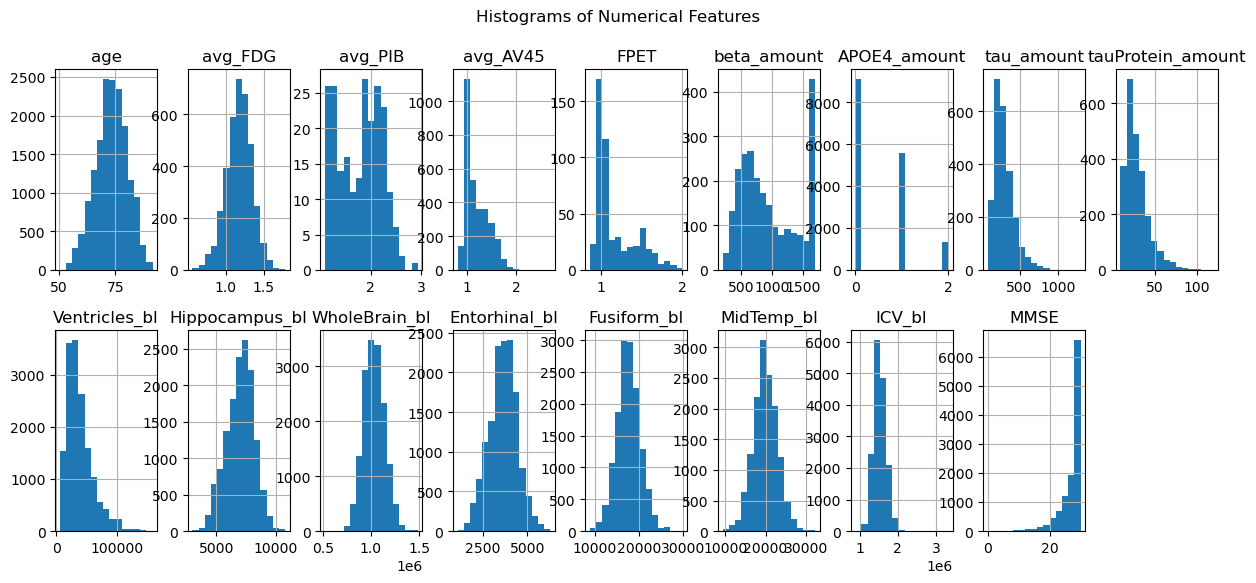

In [9]:
#Fig 1a

# Histograms for all numerical features
num_features = df0.select_dtypes(include=['float64', 'int64']).columns
df0[num_features].hist(bins=15, figsize=(15, 6), layout=(2, len(num_features)//2 + len(num_features)%2))
plt.suptitle('Histograms of Numerical Features')
plt.show()

`Fig 1a`. Histograms of numerical values

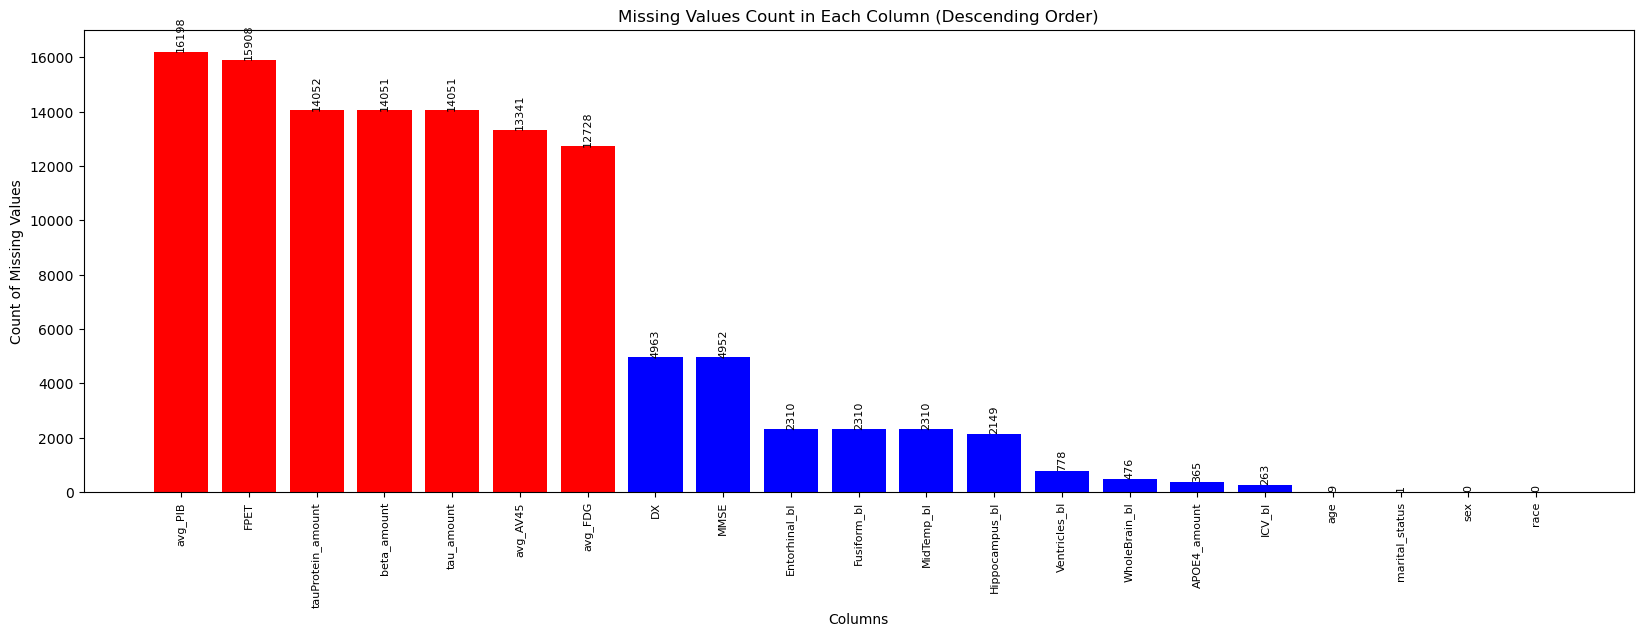

In [10]:
#Fig 1b

# Create a mapping from FLDNAME to TEXT
field_to_text = dict(zip(dict_df['FLDNAME'], dict_df['TEXT']))

# Display initial information about the DataFrame
    #print("Initial data overview:")
    #print(df0.info())
    #print("##########################")

# Create a dictionary to hold the NA counts for each column
na_counts = {column: df0[column].isna().sum() for column in df0.columns}

# Sort the dictionary by its values (the NA counts)
sorted_na_counts = dict(sorted(na_counts.items(), key=lambda item: item[1]))

# Print the sorted NA counts with descriptions
    #print("\nNA counts in each column ranked from least to most:")
    #for column, na_count in sorted_na_counts.items():
    #    description = field_to_text.get(column, "No description available")
    #    print(f"{column} ({description}): {na_count}")
    #print("##########################")

# Visualizing missing values in descending order, coloring bars red if NAs > 80% of data
plt.figure(figsize=(20, 6))
sorted_na_counts = {k: v for k, v in sorted(na_counts.items(), key=lambda item: item[1], reverse=True)}
total_rows = len(df0)

# Determine bar color based on condition (red if missing values > 75% of data)
bar_colors = ['red' if (count / total_rows) > 0.75 else 'blue' for count in sorted_na_counts.values()]

bars = plt.bar(sorted_na_counts.keys(), sorted_na_counts.values(), color=bar_colors)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values Count in Each Column (Descending Order)')

# Adding rotated count text above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=8, rotation=90)

plt.show()

`Fig. 1b`. Visualization of missing values for all variables in descending order. We can see that the variables with the most missing values have been removed. 

/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

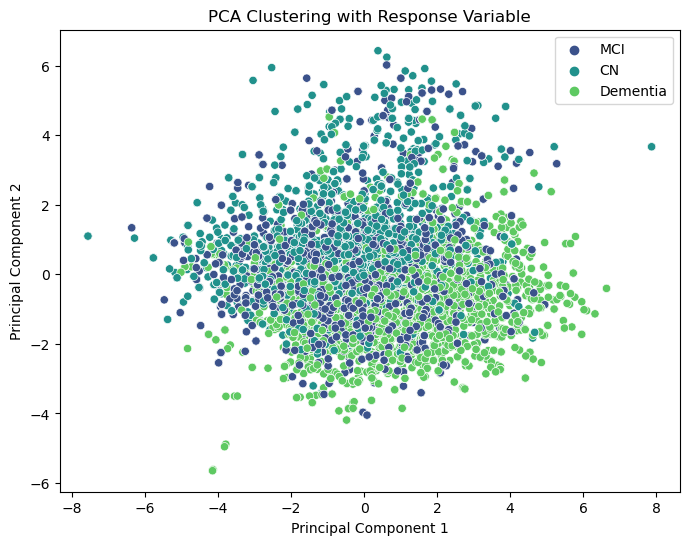

In [11]:
# Convert to DataFrame if they are NumPy arrays
X_train_df = pd.DataFrame(X_train) if isinstance(X_train, np.ndarray) else X_train
X_test_df = pd.DataFrame(X_test) if isinstance(X_test, np.ndarray) else X_test
y_train_series = pd.Series(y_train) if isinstance(y_train, np.ndarray) else y_train
y_test_series = pd.Series(y_test) if isinstance(y_test, np.ndarray) else y_test

# Combine the training and test sets
full_X = pd.concat([X_train_df, X_test_df], axis=0)
full_y = pd.concat([y_train_series, y_test_series], axis=0)

# Apply PCA
pca = PCA(n_components=2)  # Choosing 2 components for visualization
principal_components = pca.fit_transform(full_X)

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the response variable back for visualization
final_df = pd.concat([principal_df, full_y.reset_index(drop=True)], axis=1)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DX', data=final_df, palette='viridis')
plt.title('PCA Clustering with Response Variable')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


`Fig 1c`. There is some distinction between the clusters which suggests that the predictors in our dataset contain information that can distinguish between these groups. Even though PCA has provided some level of data compression, the overlap of clusters suggests that dimensionality reduction has not resulted in a completely clear separation. More complexiy is therefore likely to be necessary in the model to be able to capture the underlying non-linear relationships in the data. 


/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

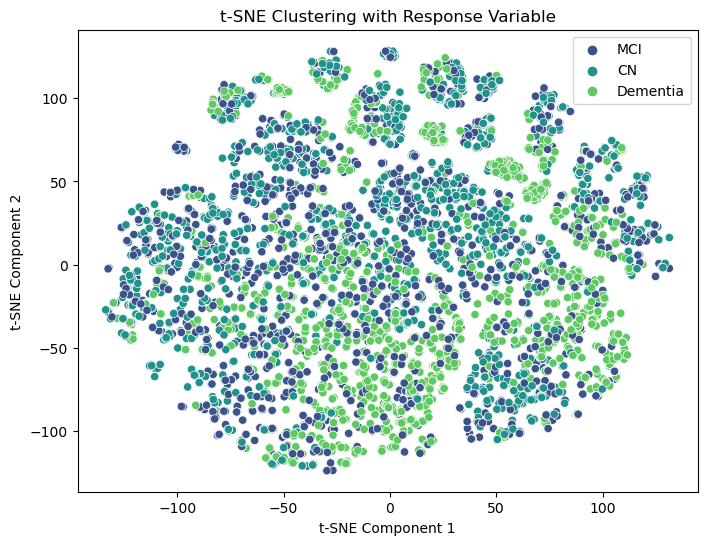

In [12]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(full_X)

# Create a DataFrame with t-SNE components
tsne_full_data = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])

# Ensure the response variable is named 'DX' and concatenate it for visualization
# Note: This step assumes that 'full_y' is a Series. If it's a DataFrame, use 'full_y['DX']' instead.
full_y_named = pd.DataFrame(full_y, columns=['DX'])

final_tsne_data = pd.concat([tsne_full_data, full_y_named.reset_index(drop=True)], axis=1)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='DX', data=final_tsne_data, palette='viridis')
plt.title('t-SNE Clustering with Response Variable')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


`Fig 1d`. t-SNE clustering of the response variable (CN = Cognitive Normal, MCI = Mild Cognitive Impairment, Dementia = Dementia). We again see the same trend shown above in the PCA plot (Fig 0c). We see a wide scatter of CN and MCI patients, with a narrower distribution for Dementia patients, but overall we see enough overlap in the response variable to justify a non-linear relationships in the data and final model.

/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Diagnosis')

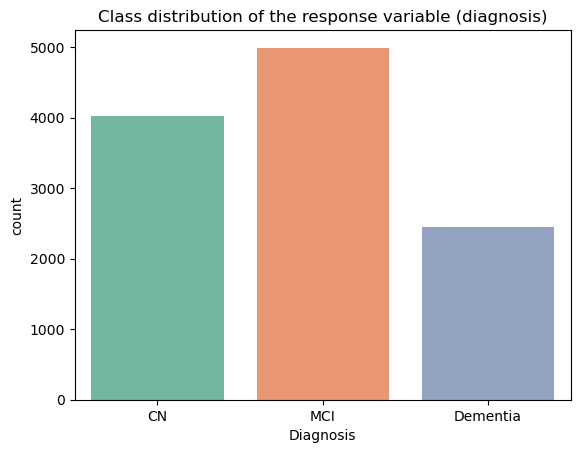

In [13]:
#Fig 2. use original df, before scaling+imputing:

#the response variable - class imbalance?
sns.countplot(x=df['DX'], palette="Set2", order=['CN','MCI','Dementia'])
plt.title("Class distribution of the response variable (diagnosis)")
plt.xlabel("Diagnosis")

`Fig 2`. (Explanation for the plot above) We can see that the dataset is composed of a balanced amount of Cognitive Normal (CN) and Mild Cognitive Impairment (MCI) diagnoses, and lower composition of Dementia diganosis. This may create some class imbalance problems, using ensemble methods such as decision trees with adjusted weight and pruning parameters should aleviate this.

/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

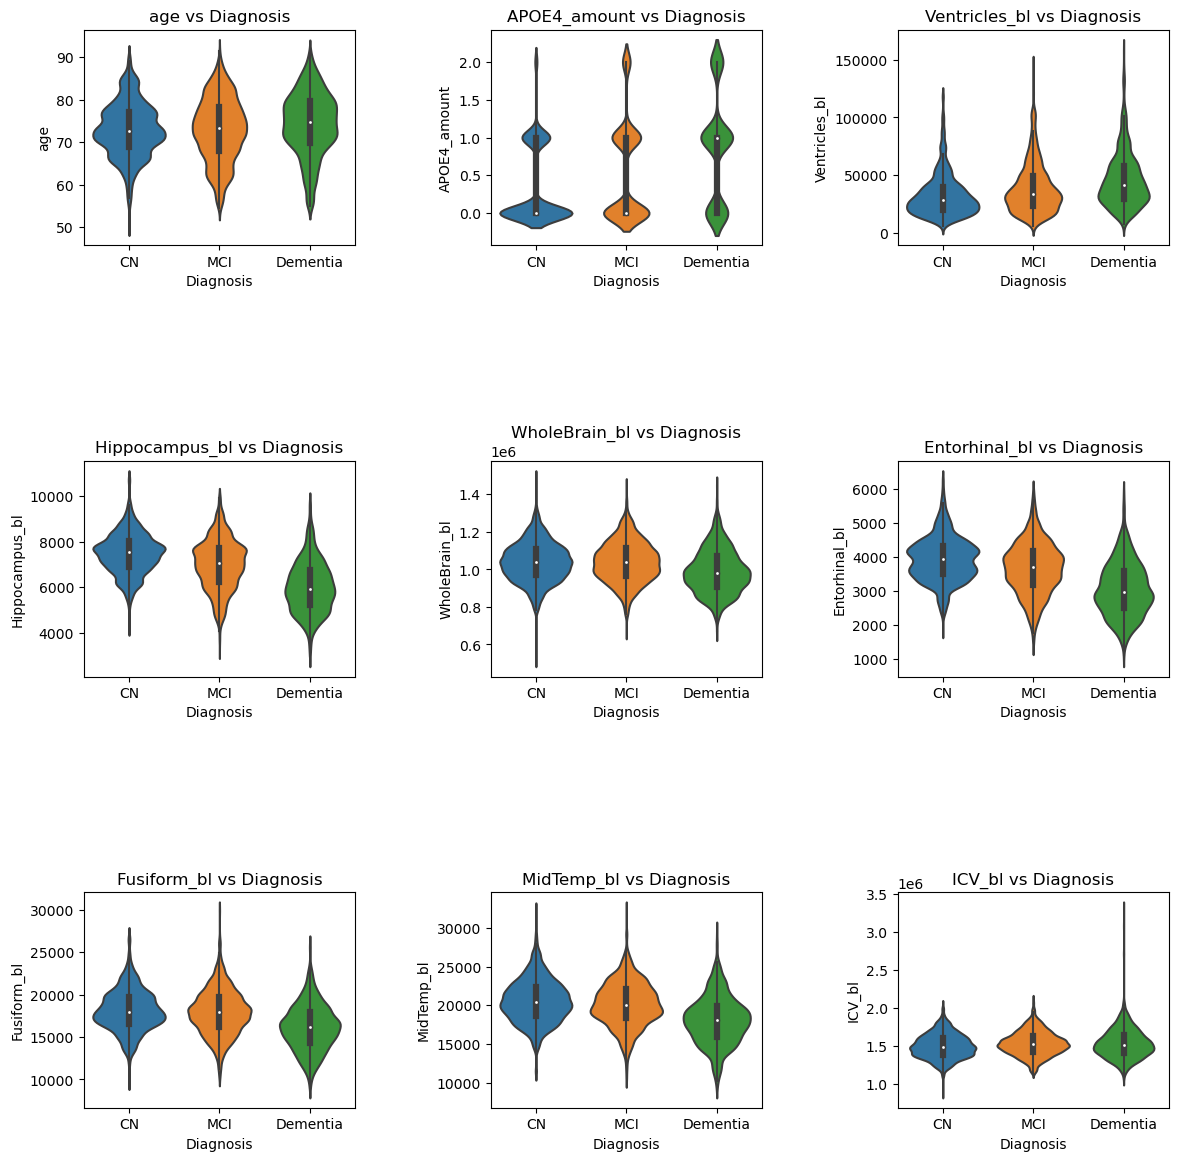

In [14]:
#numericals
categoricalDF = df[categoricalCol]
demographics = categoricalDF.columns.tolist()
df_numericals = df.drop(columns=demographics)
df_numericals = df_numericals.drop(columns=['DX'])
    #display(df_numericals.head())

#categoricals
df_categoricals = df_adni[categoricalCol]
    #display(df_categoricals.head())
df_categoricals = pd.concat([df_categoricals, df['DX']], axis=1)

#Fig 2a. patterns or trends with the response variable? -- outliers? (based on quartiles and median)
#numericals
fig, axes = plt.subplots(3, 3, figsize=(14, 14))
axes = axes.flatten()
for i, predictor in enumerate(df_numericals.columns):
    #adjust spacing
    plt.subplots_adjust(wspace=0.5, hspace=1)

    ax = axes[i]
    #sns.countplot(x='CDRSB', data=df_train, ax=axes[i], palette="Set2")
    #set order to go from least severe to most severe (cognitively, 
        # not on dementia as they're different classifications) -->  CN << MCI << Dementia
    sns.violinplot(x=df['DX'], y=df_numericals[predictor],order=['CN','MCI','Dementia'],inner ='box',ax=ax)
    ax.set_title(f"{predictor} vs Diagnosis")
    ax.set_ylabel(predictor)
    ax.set_xlabel('Diagnosis')

    #add values on top of bars - for clearer comparisons of tied ones
    for p in ax.patches:
        ax.annotate(f'{round(p.get_height(),1)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -5), textcoords='offset points', fontsize=11)

`Fig 3a`. (Explanation for the plot above) Paired plots of the response variable (CN = Cognitive Normal, MCI = Mild Cognitive Impairment, Dementia = Dementia) with all numerical variables, the bottom right corner is left blank intentionally. We can see some trends already, for example, Hippocampus_bl, Entorhinal_bl, MidTemp_bl, and MMSE decrease with increased cognitive impairement. Based on the relative width and extended line of the violinplot, we see variables such as MMSE and the dementia diagnosis category of ICV_bl with outliers that are significantly outside the range of the common cluster.

/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

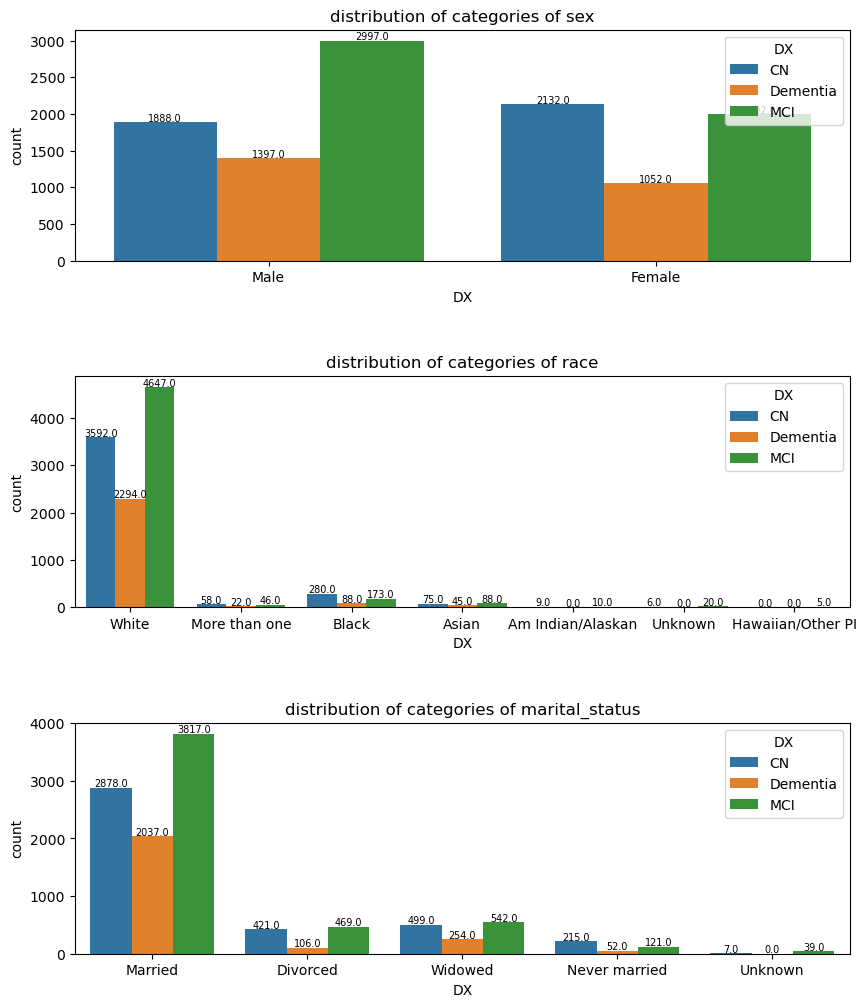

In [15]:

#Fig 3b. categorical distributions -- data bias?
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
axes = axes.flatten()
for i, predictor in enumerate(df_categoricals.columns[:3]):
    ax = axes[i]
    sns.countplot(x=predictor, hue='DX', data=df_categoricals, ax=ax)
    ax.set_title(f"distribution of categories of {predictor}")
    ax.set_ylabel("count")
    ax.set_xlabel('DX')
    plt.subplots_adjust(hspace=0.5)

    #add values on top of bars - for clearer comparisons of tied ones
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 3), textcoords='offset points', fontsize=7)

`Fig 3b`. (Explanation for the plot above) barplot of the response variable with all categorical variables (which happens to be demographics in this case). We see that majority of the population are married and white, with a rounded 10% more male patients than female patients. This class imbalance should be less problematic than the imbalance in the response variable, and we will obsesrve ensemble models' performance with this distribution given the response variable has a small imbalance among the three classes. The race distribution is highly unrepresentative of all races other than white, which could create a generalizability problem for the final model.

/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

Text(0.5, 1.02, 'bivariate relationships between numerical variables')

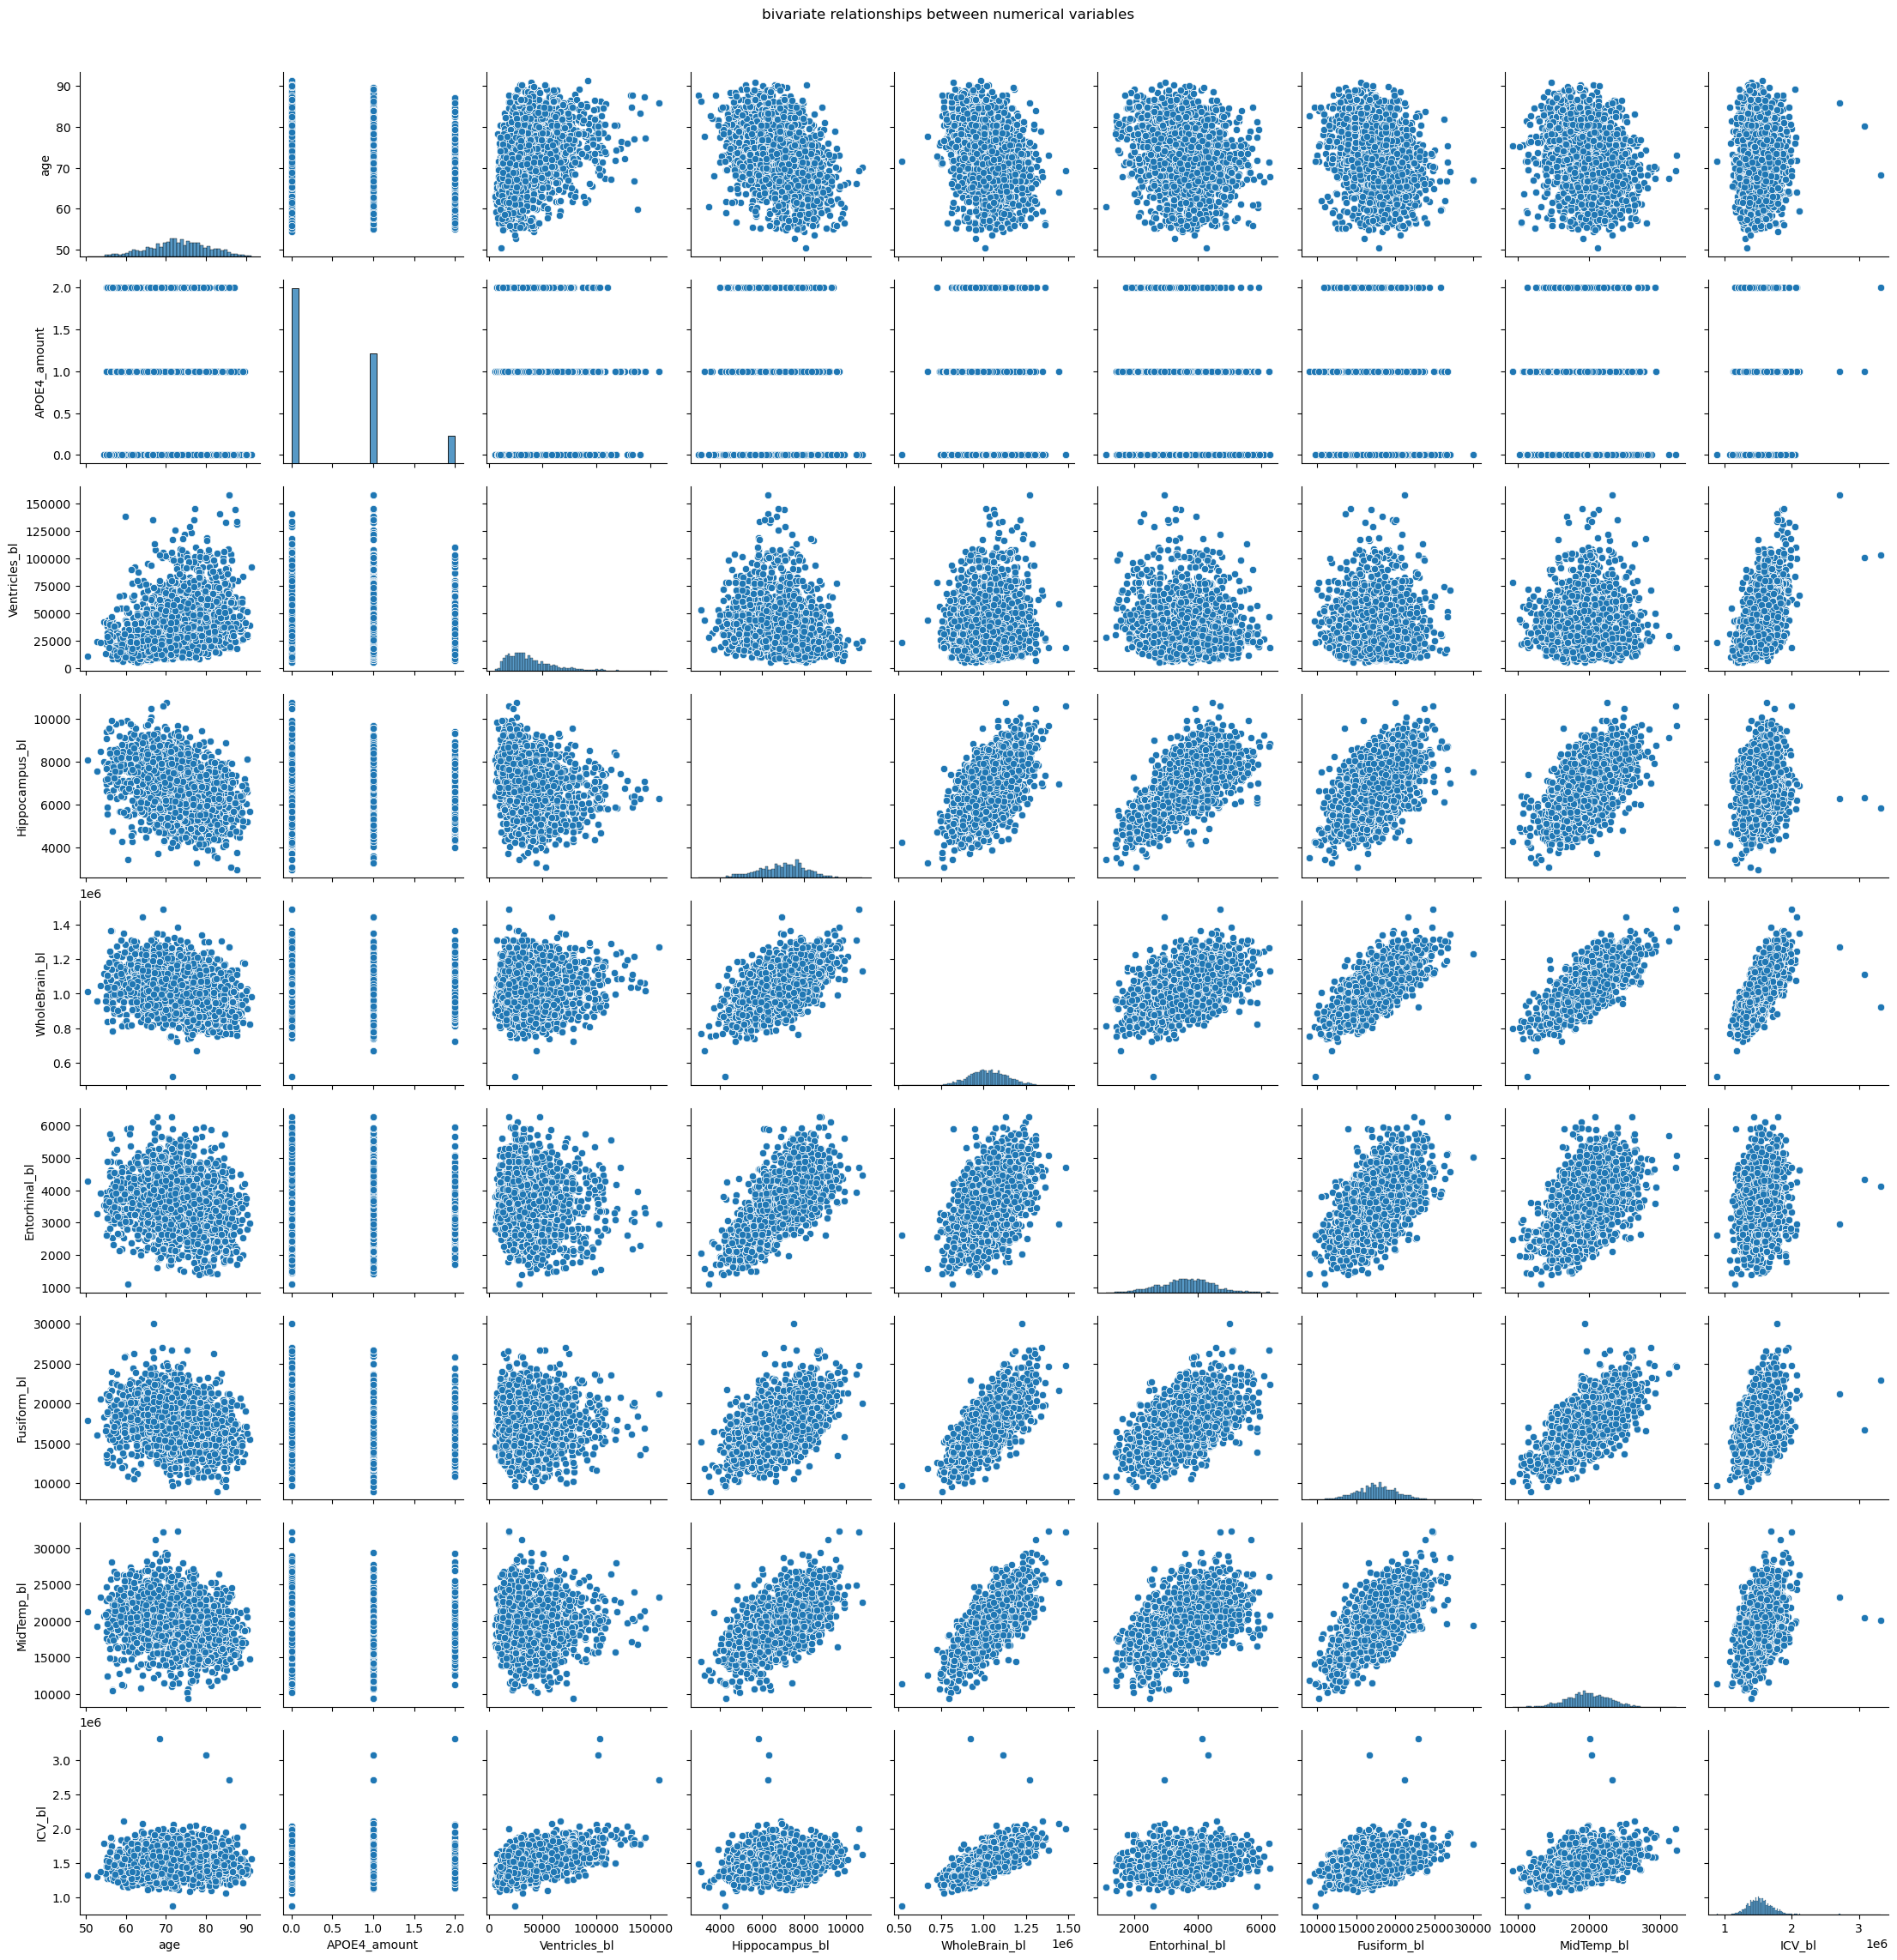

In [16]:
#Fig 4. relationship between variables
sns.pairplot(df_numericals)
plt.suptitle('bivariate relationships between numerical variables', y=1.02)

`Fig 4`. (Explanation for the plot above) supplemental plot for the pairwise relationships between numerical variables. We can see some linear relationships such as between the baseline variables ('Ventricles_bl','Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl','MidTemp_bl', 'ICV_bl'), which describe the neuroanatomy of the patients. 

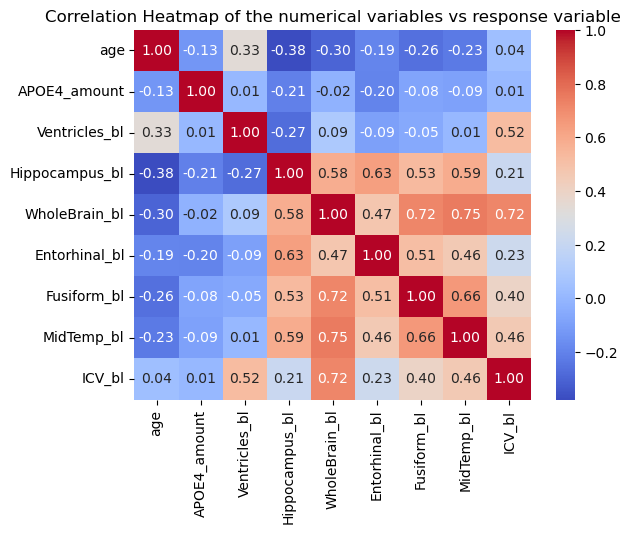

In [17]:
#Fig 5. correlation matrix -- confounding variables
correlation_matrix = df_numericals.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of the numerical variables vs response variable')
plt.show()

`Fig 5`. (Explanation for the plot above) correlation matrix represented with a heatmap, capturing the correlation between numerical variables. We again see a high correlation between the baseline variables ("..._bl" variables such as Hippocampus_bl and WholeBrain_bl), which are the confounding variables that should be expected.

<a id='model_choice'></a>
# 4. Choosing A Model: Random Forest with Cross Validation
[Return to table of contents](#table-contents)

We chose a random forest as our baseline model, given that they are suitable for handling the size, complexity and potential non-linear relationships in the data, and are suitable for a multi-classification problem. In a random forest, multiple decision trees are constructed during training, and the class that is the mode of the classes of the individual trees is output. As an ensemble method, random forests exhibit robustness and adaptability, which is useful when dealing with data with significant dispersion, as is evident in our t-SNE and PCA graphs. This dispersion signals the complex relationships within our high-dimensional dataset. Random forests are also well-equipped to manage this due to their non-parametric nature. 

Random forests allow for multiclass classification problems, which allows us to distinguish between the stages of Alzheimer's disease progression. The algorithm's ability to provide insights into feature importance (by observing our decision boundaries) allows for interpretability that is additionally very valuable in a medical setting. These characteristics of random forests align well with the complex nature of our data and the disease we chose to study.

We use Cross Validation to fine tune our hyperparameters. Specifically, RandomizedSearchCV was chosen to select the best hyperparametrs, which include n_estimators, min_samples_split, min_samples_leaf, max_features, and maximum depth. RandomizedSearchCV chooses the best hyperparameters by randomly selecting combinations of parameters to test, while holding the other ones constant. This is an efficient way to cross validating multiple hyperparameters as it does not go through every possible permutation, like GridSearchCV, which is both time and computationally expensive. The best hyperparameters were selected based on which model gave the best F1 score. F1 score was chosen over accuracy due to the fact that it is better suited for class imbalances. 

In [18]:
import time
start_time = time.time()

rf_classifier = RandomForestClassifier(random_state=109)

# hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Hyperparameter tuning using RandomizedSearchCV (5-fold cross-validation)
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,
    scoring=make_scorer(f1_score, average='weighted'),
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_df, y_train_series)

#best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# best model
best_rf_model = random_search.best_estimator_

y_test_pred = best_rf_model.predict(X_test_df)

train_f1 = f1_score(y_train_series, best_rf_model.predict(X_train_df), average='weighted')
test_f1 = f1_score(y_test_series, y_test_pred, average='weighted')

print("Training F1 Score (Weighted):", train_f1)
print("Test F1 Score (Weighted):", test_f1)



Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Training F1 Score (Weighted): 0.9061933661974885
Test F1 Score (Weighted): 0.8342319364370865


We see that the best hyperparameters are: n_estimators = 200, min_samples_split = 5, min_samples_leaf = 1, max_features = log2 and maximum depth = 20. This results in a weighted F1 score of 0.95 on the training data and 0.82 on the test data, which are both very high scores and indicate good model performance. 

<a id="model_eval"></a>
# 5. Model Interpretation and Evaluation
[Return to table of contents](#table-contents)

Elapsed Time: 74.076167345047 seconds
Test Accuracy: 0.8342059336823735
Classification Report:
               precision    recall  f1-score   support

          CN       0.89      0.91      0.90       804
    Dementia       0.73      0.81      0.77       490
         MCI       0.85      0.78      0.81       998

    accuracy                           0.83      2292
   macro avg       0.82      0.84      0.83      2292
weighted avg       0.84      0.83      0.83      2292



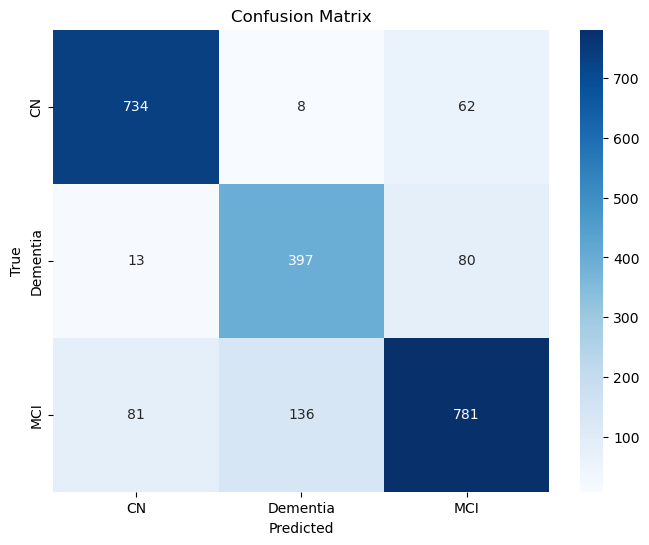

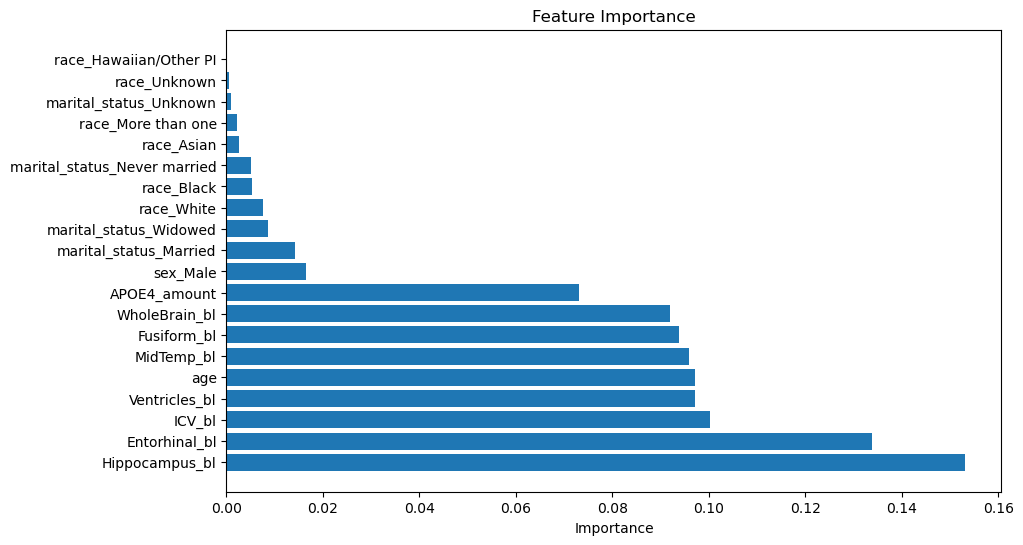

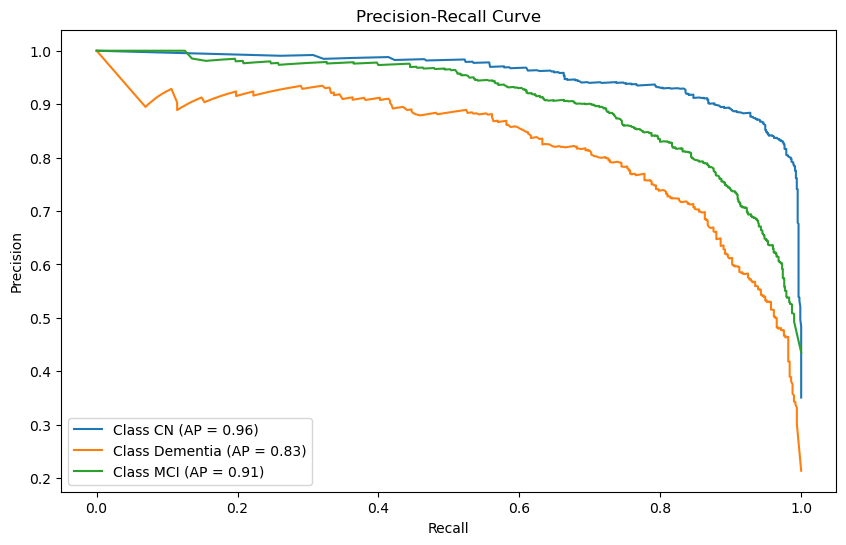

Training AUC Scores:
Class CN: 0.9944770339879611
Class Dementia: 0.9866774283731983
Class MCI: 0.9741804270081249

Test AUC Scores:
Class CN: 0.9787286684855293
Class Dementia: 0.9458934517203108
Class MCI: 0.9184683122040062


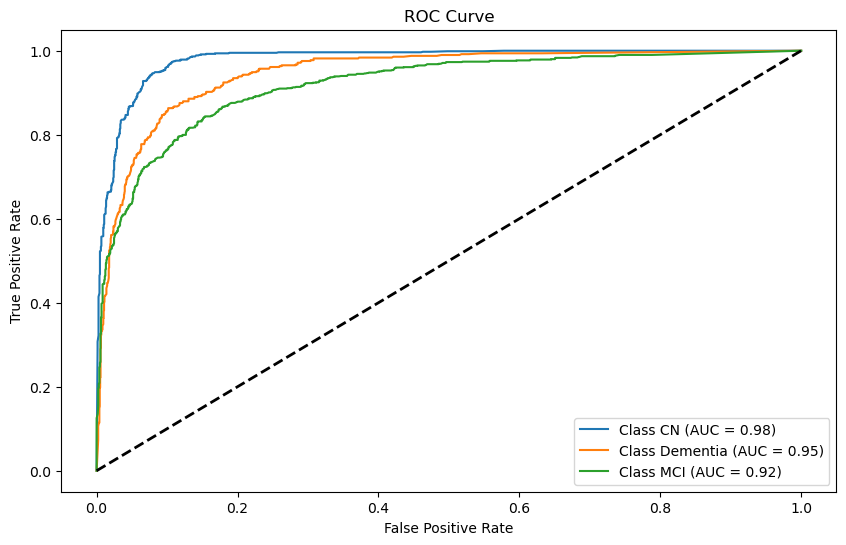

In [19]:

y_test_pred = best_rf_model.predict(X_test_df)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")


# Evaluate accuracy
accuracy = accuracy_score(y_test_series, y_test_pred)
print("Test Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test_series, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test_series, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_series), yticklabels=np.unique(y_test_series))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Get feature importances
feature_importances = best_rf_model.feature_importances_
feature_names = X_train_df.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Precision-Recall Curve
y_test_binarized = label_binarize(y_test_series, classes=np.unique(y_test_series))
y_test_pred_proba = best_rf_model.predict_proba(X_test_df)

precision = dict()
recall = dict()
average_precision = dict()

for i in range(len(np.unique(y_test_series))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    average_precision[i] = auc(recall[i], precision[i])

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
classes = np.unique(y_test_series)
# Plot each class's curve
for i in range(len(np.unique(y_test_series))):
    plt.plot(recall[i], precision[i], label=f'Class {classes[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

y_train_pred_proba = best_rf_model.predict_proba(X_train_df)
#y_test_pred_proba = rf_classifier.predict_proba(X_test_df)
# Binarize the labels for AUC calculation
y_train_binarized = label_binarize(y_train_series, classes=classes)
y_test_binarized = label_binarize(y_test_series, classes=classes)

n_classes = len(classes)

# Initialize dictionaries to store AUC scores
train_auc_scores = {}
test_auc_scores = {}

# Calculate AUC scores for each class
for i in range(n_classes):
    #Training AUC
    train_auc_scores[classes[i]] = roc_auc_score(y_train_binarized[:, i], y_train_pred_proba[:, i], multi_class='ovr')
  
    
    # Test AUC
    test_auc_scores[classes[i]] = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba[:, i], multi_class='ovr')

# Print out the AUC scores
print("Training AUC Scores:")
for class_label, auc_score in train_auc_scores.items():
    print(f"Class {class_label}: {auc_score}")

print("\nTest AUC Scores:")
for class_label, auc_score in test_auc_scores.items():
    print(f"Class {class_label}: {auc_score}")



fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate FPR, TPR, and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC Curve for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


`Fig 6` Evalutation:

Looking at our Classification matrix, we see that the CN class has the highest precision at 0.88, followed by MCI, followed by Dementia at 0.72. CN also has the highest recall at 0.91, followed by Dementia, and then MCI is the worst at 0.77.  We want high precision AND high recall, so we look at f1 score, where we see that CN has the highest f1 score at 0.90, and then MCI has a f1 score of 0.81, and then Dementia has the worst f1 score at 0.76. 

Reflecting on these results in the context of Alzheimers, we see that both Dementia and Mild Cignitive Impariment have lower precision than the normal cognitive class. Although these values are still decently high, it is important to consider that this means our model is not always catching the true cases of both Dementia and MCI. Low precision means out of all of our predicted positives, they are not all correct, some of them are false positives. While the dementia class has lower precision than MCI (and CN), it has higher recall than MCI (although still lower than CN). High recall means that we are capturing most of the true cases of Dementia and not getting many false negatives. This is imperative in Alzheimers detection as we want to catch Alzheimers early to have the best possible treatment plan and care. Just like in many medical diagnostic tests, we would rather have more false positves than false negatives, as a false negative means someone with Alzheimers goes without treatment. It makes sense that the MCI class has low recall as this is "Mild Cognitive Impairment" and there is a grey line between whether this counts as Alzheimers (in early stage) or it is still Normal. Thus, MCI is the most difficult to predict because patients with this classification should have the widest range of values, compared to normal or dementia patients. Furthermore, we can also see this trend in the PCA and t-SNE plots earlier, with the widest scatter of MCI points. 

We see this when looking at the plotted confusion matrix. For CN, out of all actual positives, we see most of them are true positives, incidcating high recall. For Dementia, we see out of all actual positives, we see a significant proportion of them predicted as MCI, indicating lower recall compared to CN. For MCI, we see that most of the actual positives are predicted as MCI, but the ones that are not, are split almost evenly between CN and Dementia.  

We can see this trend continue when observing our ROC curves and AUC values for each of the classes. In distinguishing the cognitive normal class, CN, the AUC is 0.98. This means that the model is extremely effective at identifying individuals without dementia. The dementia class is second best at 0.94, and the MCI class is third at 0.92. Overall, these AUC metrics reflect the strong discriminative power the model, and its ability to generalize well across various stages of cognitive impairment.

Looking at our Precision Recall Class, we see that our Dementia class has the lowest precision-recall score, MCI and CN are similar at the start but then MCI's score is lower as we move right. 

In terms of feature importance, we see the hippocampus baseline level and entorhinal cortex are the most significant predictors, which make sense because these regions are known to shrink due to beta-amyloid protein and tau protein accumulation. As a whole, neuroimaging data (with respect to brain region size) are much more relevant predictors than demographics. The APOE4 gene levels are a significant feature importance which also makes sense since this modecule is involved with beta-amyloid accumulation. However, we were surprised to find that it is not one of the top features of importance since this gene is one of the most studied and highly correlated biological factors for AD. Age is the most significant demographic predictor (and is one of the top 4 predictors, grouped in with neuroimaging data) which also makes sense with our domain knowledge, as typically dementia is more common in older adults. Race doesn't appear to be too significant. 



<a id="model_comparison"></a>
# 6. Comparison to Simple Decision Tree and Bagging Model
[Return to table of contents](#table-contents)

In [20]:
#make simple decision tree to compare too
dt = DecisionTreeClassifier(random_state=109)
dt.fit(X_train_df, y_train_series)
y_test_pred_dt = dt.predict(X_test_df)
f1_dt = f1_score(y_test_series, y_test_pred_dt, average='weighted')
accuracy_dt = accuracy_score(y_test_series, y_test_pred_dt)
print("Decision Tree:")
print("F1 Score (Weighted):", f1_dt)
print("Accuracy:", accuracy_dt)

#Bagging Model
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=109),
                                       n_estimators=50, random_state=42)
bagging_classifier.fit(X_train_df, y_train_series)
y_test_pred_bagging = bagging_classifier.predict(X_test_df)
f1_bagging = f1_score(y_test_series, y_test_pred_bagging, average='weighted')
accuracy_bagging = accuracy_score(y_test_series, y_test_pred_bagging)

print("\n Bagging Metrics:")
print("F1 Score (Weighted) - Bagging Model:", f1_bagging)
print("Accuracy:", accuracy_bagging)

#our model's f1 score: 
print(" \n Random Forest Model:")
print("F1 Score (Weighted) - Original RF Model:", test_f1)
print(" Accuracy:", accuracy)

Decision Tree:
F1 Score (Weighted): 0.8226649648214024
Accuracy: 0.8224258289703316


/Users/tillyrigby/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



 Bagging Metrics:
F1 Score (Weighted) - Bagging Model: 0.829236219363402
Accuracy: 0.8289703315881326
 
 Random Forest Model:
F1 Score (Weighted) - Original RF Model: 0.8342319364370865
 Accuracy: 0.8342059336823735


With an F1 Score of 0.822 in a Simple Dcision Tree, 0.829 in a Bagging Model, and our initial Random Forest Model of 0.834, we can conclude that our Random Forest model is best with the highest F1 score, although all perform similarly. The accuracy of the model follows the same order, with a simple decision tree being the worst at 0.822, bagging at 0.828, and our random forest at 0.834. 

Logically, we would expect to see this order in performance, although maybe with even more difference between them. A bagging model is typically better than a simple decision tree as it reduces the variance while still allowing some complexity, since it is an ensemble method that aggregates the results from each of the trees. A weakness of bagging models, however, is that the trees are highly correlated since our trees are mostly the same (since we split on the most important predictor each time, which doesn't change much in each bootstrapped sample). However, a random forest improves upon this weakness from bagging as it takes random subsets of each bootstrap at each split in the bootstrapped tree. Thus, we expect random forest to have the better performance of the three models, which we do see in our results. 

<a id="conclude"></a>
# 7. Conclusion
[Return to table of contents](#table-contents)

Based on our results, we have found that the most important features in our model are brain region size, age, and APOE4 gene expression. This aligns correctly with current scientific literature because it is known that individuals are more likely to have dementia as they age.  APOE4 is repsonsible for the expression of beta-amyloid proteins, the peptides that lead to apoptosis of neurons when largely accumulated. The presennce of APOE4 being an important predictive factor makes sense in our model since it is heavily tied to dementia. Furthermore, the fact that it causes cell death of the neurons means there should be brain region loss. This is evident in the neuroimaging factors shown in the feature importance graph of Figure 6. 

We also found that the dementia diagnosis to have the lowest F1 score meaning that the model had the most difficulty with balancing precision and recall in comparison to MCI and CN. However, we have established that our model is a good classifier based on the testing accuracy score being 0.8.

<a id="conclude"></a>
# 8. Future Work
[Return to table of contents](#table-contents)

Our model achieved very good performance overall. Our ROC values across all classes were above 0.90, which is indicative of very effective classifiers (Mandrekar, 2010). However, we would like to address the limitations in our analysis due to the data imbalances in our predictors. The significant imbalance for certain predictors, for example, the overrepresentation of White and married individuals in our data, could introduce biases. The high importance scores for these demographics in our feature importance graph may not accurately reflect their predictive power but instead could be a result of this overrepresentation, limiting the model's applicability to the general population and especially underrepresented groups in the data.

To counter these imbalances, we propose the use of methods such as Cluster-Based Oversampling to upsample our minority classes. These techniques may be useful since they do not introduce the uniformity often seen in traditional oversampling methods (Jo & Japkowicz, 2004). 

We would additionally like to employ trials with reweighting and adversarial debiasing algorithms which could potentially offer a dynamic approach to mitigating bias (Zhang, Lemoine, & Mitchell, 2018). 

Finally we propose implementing model interpretation tools such as SHAP in order to validate that feature importance actually reflects predictive relevance for the entire population, and is not just a result of overrepresentation (Lundberg & Lee, 2017).

**References**

1. Mandrekar, J. N. (2010). Receiver Operating Characteristic Curve in Diagnostic Test Assessment. Journal of Thoracic Oncology, 5(9), 1315-1316. https://doi.org/10.1097/JTO.0b013e3181ec173d.
2. He, H., Bai, Y., Garcia, E. A., & Li, S. (2008). ADASYN: Adaptive synthetic sampling approach for imbalanced learning. In 2008 IEEE International Joint Conference on Neural Networks (IEEE World Congress on Computational Intelligence). IEEE.
3. Jo, T., & Japkowicz, N. (2004). Class imbalances versus small disjuncts. ACM SIGKDD Explorations Newsletter, 6(1), 40-49.
4. Zhang, B. H., Lemoine, B., & Mitchell, M. (2018). Mitigating unwanted biases with adversarial learning. In Proceedings of the 2018 AAAI/ACM Conference on AI, Ethics, and Society.
5. Lundberg, S. M., & Lee, S.-I. (2017). A unified approach to interpreting model predictions. arXiv preprint arXiv:1705.07874.